# Spam Text Classification

In second week of inzva Applied AI program, we are going to create a spam text classifier using RNN's. Our data have 2 columns. The first column is the label and the second column is text message itself. We are going to create our model using following techniques

- Embeddings
- SimpleRNN
- GRU
- LSTM
- Ensemble Model

### SimpleRNN

Simple RNN layer. Nothing special. The reason it is 'Simple' because it is not GRU nor LSTM layer. You can read the documentation from https://keras.io/api/layers/recurrent_layers/simple_rnn/

### LSTM

https://keras.io/api/layers/recurrent_layers/lstm/

We will use tokenization and padding to preprocess our data. We are going to create 3 different models and compare them.

## Libraries

In [ ]:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

## Dataset

In [ ]:
!wget https://raw.githubusercontent.com/inzva/Applied-AI-Study-Group/master/Applied%20AI%20Study%20Group%20%233%20-%20June%202020/week2/SpamTextClassification/datasets_2050_3494_SPAM%20text%20message%2020170820%20-%20Data.csv


In [ ]:
data = pd.read_csv("datasets_2050_3494_SPAM text message 20170820 - Data.csv")

Let's see the first 20 rows of our data and read the messages. What do you think, are they really look like spam messages?

In [ ]:
data.head

Let's calculate spam and non-spam message counts.

In [ ]:
texts = []
labels = []
for i, label in enumerate(data['Category']):
    texts.append(data['Message'][i])
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

texts = np.asarray(texts)
labels = np.asarray(labels)


print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

In [ ]:
labels

In [12]:
hamc= sum(labels==0)

In [13]:
spamc=sum(labels==1)

In [14]:
spamc /(hamc+spamc)

0.13406317300789664

### Data is imbalanced. Making it even more imbalanced by removing some of the spam messages and observing the model performance would be a good exercise to explore imbalanced dataset problem in Sequential Model context.

In [ ]:
texts

## Data Preprocessing

Each sentence has different lengths. We need to have sentences of the same length. Besides, we need to represent them as integers.

As a concerete example, we have following sentences
- 'Go until jurong point crazy'
- 'any other suggestions'

First we will convert the words to integers, which is a way of doing Tokenization.

- [5, 10, 26, 67, 98]
- [7, 74, 107]

Now we have two integer vectors with different length. We need to make them have the same length. 

### Post Padding
- [5, 10, 26, 67, 98]
- [7, 74, 107, 0, 0]

### Pre Padding
- [5, 10, 26, 67, 98]
- [0, 0, 7, 74, 107]

But you don't have to use padding in each task. For details please refer to this link https://github.com/keras-team/keras/issues/2375

Bucketing in NLP

In [15]:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# number of words in our vocabulary 
max_features = 10000

# how many words from each document (max)?
maxlen = 500

## Train - Test Split

We will take a simple approach and create only train and test sets. Of course having train, test and validation sets is the best practise.

In [16]:
training_samples = int(len(labels)*0.8)

In [17]:
training_samples

4457

In [18]:
validation_samples = int(5572 - training_samples)

In [19]:
assert len(labels) == (training_samples + validation_samples), "Not equal!"

In [20]:
print("The number of training {0}, validation {1} ".format(training_samples, validation_samples))

The number of training 4457, validation 1115 


## Tokenization

In [21]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("Found {0} unique words: ".format(len(word_index)))

Found 9004 unique words: 


In [22]:
#data = pad_sequences(sequences, maxlen=maxlen, padding='post')
data = pad_sequences(sequences, maxlen=maxlen)

In [23]:
print(data.shape)

(5572, 500)


In [24]:
data

array([[   0,    0,    0, ...,   58, 4427,  144],
       [   0,    0,    0, ...,  472,    6, 1940],
       [   0,    0,    0, ...,  660,  391, 2994],
       ...,
       [   0,    0,    0, ...,  107,  250, 9003],
       [   0,    0,    0, ...,  198,   12,   47],
       [   0,    0,    0, ...,    2,   61,  267]], dtype=int32)

In [25]:
np.random.seed(42)
# shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]


texts_train = data[:training_samples]
y_train = labels[:training_samples]
texts_test = data[training_samples:]
y_test = labels[training_samples:]

## Model Creation

We will create 3 different models and compare their performances. One model will use SimpleRNN layer, the other will use GRU layer and the last one will use LSTM layer. Architecture of each model is the same. We can create deeper models but we already get good results.

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
             metrics=['acc'])

history_rnn = model.fit(texts_train, y_train, epochs=10,
                       batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 24s 360ms/step - loss: 0.3989 - acc: 0.8765 - val_loss: 0.1208 - val_acc: 0.9641
Epoch 2/10
60/60 [==============================] - 21s 354ms/step - loss: 0.1051 - acc: 0.9745 - val_loss: 0.0798 - val_acc: 0.9731
Epoch 3/10
60/60 [==============================] - 21s 351ms/step - loss: 0.0537 - acc: 0.9878 - val_loss: 0.0477 - val_acc: 0.9877
Epoch 4/10
60/60 [==============================] - 21s 357ms/step - loss: 0.0313 - acc: 0.9912 - val_loss: 0.0446 - val_acc: 0.9865
Epoch 5/10
60/60 [==============================] - 22s 363ms/step - loss: 0.0431 - acc: 0.9881 - val_loss: 0.0623 - val_acc: 0.9821
Epoch 6/10
60/60 [==============================] - 21s 352ms/step - loss: 0.0131 - acc: 0.9966 - val_loss: 0.1282 - val_acc: 0.9552
Epoch 7/10
60/60 [==============================] - 21s 357ms/step - loss: 0.0269 - acc: 0.9926 - val_loss: 0.0645 - val_acc: 0.9832
Epoch 8/10
60/60 [==============================] - 21s 358ms/step - 

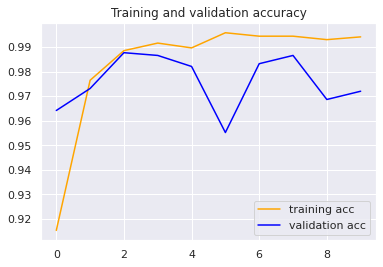

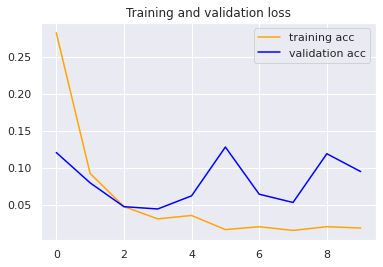

In [ ]:
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
pred = model.predict_classes(texts_test)
acc = model.evaluate(texts_test, y_test)
proba_rnn = model.predict_proba(texts_test)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

In [ ]:
sum(y_test==1)

## GRU

In [ ]:
from keras.layers import GRU

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
             metrics=['acc'])

history_rnn = model.fit(texts_train, y_train, epochs=10,
                       batch_size=60, validation_split=0.2)

In [ ]:
pred = model.predict_classes(texts_test)
acc = model.evaluate(texts_test, y_test)
proba_gru = model.predict_proba(texts_test)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

## LSTM

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history_lstm = model.fit(texts_train, y_train, epochs=10,
                        batch_size=60, validation_split=0.2)

In [ ]:
acc = history_lstm.history['acc']
val_acc = history_lstm.history['val_acc']
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
pred = model.predict_classes(texts_test)
acc = model.evaluate(texts_test, y_test)
proba_ltsm = model.predict_proba(texts_test)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

## Ensemble Model

In [ ]:
ensemble_proba = 0.25 * proba_rnn + 0.35 * proba_gru + 0.4 * proba_lstm
ensemble_proba[:5]

In [ ]:
ensemble_class = np.array([1 if i >= 0.3 else 0 for i in ensemble_proba])

In [ ]:
print(confusion_matrix(ensemble_class, y_test))
